<a target="_blank" href="https://colab.research.google.com/github/Techtonique/ahead/blob/main/2024_03_10_joss_ahead.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---
title: '`ahead`: Univariate and multivariate time series forecasting with uncertainty quantification (including simulation approaches)'
tags:
- Python
- R
- Julia
- Time series
- Forecasting
- Machine Learning
- Uncertainty
date: "March 10, 2024"
output:
  pdf_document: default
html_document:
  df_print: paged
urlcolor: blue
author: "T. Moudiki"
affiliation: "techtonique.github.io"
authors:
- name: "T. Moudiki"
  orcid: "0000-0002-9422-5459"
  equal-contrib: yes
  affiliation: 1, 2
- name: Author with no affiliation
  corresponding: yes
  affiliation: 3
bibliography: biblio.bib
aas-doi: "10.3847/xxxxx <- update this with the DOI from AAS once you know it."
aas-journal: "Journal of Open Source Software."
affiliations:
- name: T Moudiki
---

In [18]:
!pip install rpy2

# Summary

This paper presents two original Machine Learning methods implemented in the `ahead` package for forecasting univariate and multivariate time series. `dynrmf` is an autoregressive model that can utilize any Machine Learning model for forecasting univariate time series, while `ridge2f` extends ridge regression with two regularization parameters and a hidden layer for producing nonlinear outputs.

# Statement of need

Forecasting Multivariate time series (MTS hereafter) is important for business planning and decision support in finance, insurance, and other industries such as *Energy* (load anticipation) and meteorology. One can obtain point forecasts from a statistical/Machine Learning (ML) model, but these point forecasts are generally of limited importance to analysts. What matters more is the model's ability to quantify the uncertainty around its predictions. 

There are multiple MTS forecasting methods implemented in [\textsf{R} package](https://github.com/Techtonique/ahead) `ahead`'s version `0.11.0` (there are also [\textsf{Python}](https://github.com/Techtonique/ahead_python) and [\textsf{Julia}](https://github.com/Techtonique/Ahead.jl) implementations, both following \textsf{R}'s API as closely as possible). `ahead` is available through the [R-universe](https://techtonique.r-universe.dev/builds), which allows the package to be continuously integrated and distributed across all major platforms (Windows, macOS, Linux).

All of `ahead`'s forecasting methods include parametric prediction intervals alongside non-parametric, simulation-based uncertainty quantification techniques. This paper describes **two** of these Machine Learning methods, **not available in any other statistical software**:

* \mbox{\texttt{dynrmf}}; an autoregressive dynamic Machine Learning model inspired by NNAR (**N**eural **N**etwork **A**uto**r**egression), see @hyndman2013forecasting. As NNAR, \mbox{\texttt{dynrmf}} does an automatic choice of the number of autoregressive and seasonal time series lags. However, instead of an artificial neural network, as implemented in NNAR, \mbox{\texttt{dynrmf}} __can use any ML model__.

*  \mbox{\texttt{ahead::ridge2f}} (@moudiki2018multiple) implements a __quasi-randomized *neural* networks__ model extending [ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) to 2 regularization parameters, and capable of producing  nonlinear outputs thanks to the use of a *hidden layer*. \newline Since its first publication in 2018, \mbox{\texttt{ahead::ridge2f}} has been enhanced for integrating uncertainty quantification through the (independent and block) bootstrap (@efron1986bootstrap) and copulas simulations (@brechmann2013modeling, @nagler2023vine). Future (ongoing)  developments include conformal prediction (@vovk2005algorithmic) and Kernel Density Estimation (@silverman2018density).

# Examples

## Install `ahead` in \textsf{R}



In [19]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [20]:
%%R
options(repos = c(
    techtonique = 'https://techtonique.r-universe.dev',
    CRAN = 'https://cloud.r-project.org'))
utils::install.packages("rmarkdown", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("remotes", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("forecast", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("fpp", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("ggplot2", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("e1071", repos = c(CRAN="https://cloud.r-project.org"))
utils::install.packages("randomForest", repos = c(CRAN="https://cloud.r-project.org"))
remotes::install_github("Techtonique/ahead")
utils::install.packages("dfoptim")


Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/downloaded_packages

Les packages binaires téléchargés sont dans
	/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//RtmpLUGsJa/down

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/rmarkdown_2.26.tgz'
Content type 'application/x-gzip' length 2620519 bytes (2.5 MB)
downloaded 2.5 MB

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/remotes_2.4.2.1.tgz'
Content type 'application/x-gzip' length 397070 bytes (387 KB)
downloaded 387 KB

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/forecast_8.22.0.tgz'
Content type 'application/x-gzip' length 2510565 bytes (2.4 MB)
downloaded 2.4 MB

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/fpp_0.5.tgz'
Content type 'application/x-gzip' length 80643 bytes (78 KB)
downloaded 78 KB

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/ggplot2_3.5.0.tgz'
Content type 'application/x-gzip' length 4832689 bytes (4.6 MB)
downloaded 4.6 MB

essai de l'URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/e107

In [21]:
%%R
library(ahead)
library(forecast)
library(ggplot2)
library(randomForest)
library(e1071)

## Use `ahead::ridge2f`

### Use `ahead::ridge2f` for univariate time series forecasting

In all these examples, 5 nodes in the hidden layer and a ReLU activation function are used (default hyperparameters, see @goodfellow2016deep and @moudiki2018multiple for more details).

The `fdeaths` data set below contains **monthly deaths of females from various diseases in the UK, 1974-1979**. Here's how to obtain 20-steps-ahead forecasts for `fdeaths` with `ahead::ridge2f`; including seasonality terms. The default level for the prediction interval is equal to 95%.


In [22]:
%%R
x <- fdeaths # input dataset
xreg <- ahead::createtrendseason(x) # add seasonality and trend
z <- ahead::ridge2f(x, xreg = xreg, h=20L) # forecasting h-steps ahead

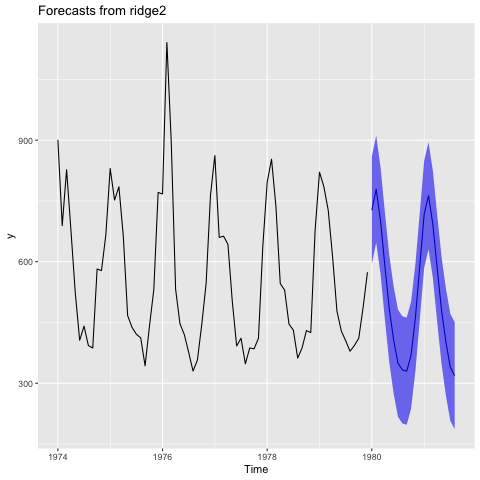

In [23]:
%%R
ggplot2::autoplot(z) # plot forecast

`EuStocksLogReturns` contains the daily log-returns of major European stock indices, with 1860 observations. Only the first 100 dates of the DAX index dataset are used in the example below.

In [24]:
%%R
data(EuStockMarkets)
EuStocks <- ts(EuStockMarkets[1:100, ],
               start = start(EuStockMarkets),
               frequency = frequency(EuStockMarkets)) # original data
EuStocksLogReturns <- ahead::getreturns(EuStocks, type = "log") # obtain log-returns
res <- ahead::ridge2f(EuStocksLogReturns[, "DAX"], h = 20L,
type_pi = "movingblockbootstrap",
                        show_progress = FALSE)

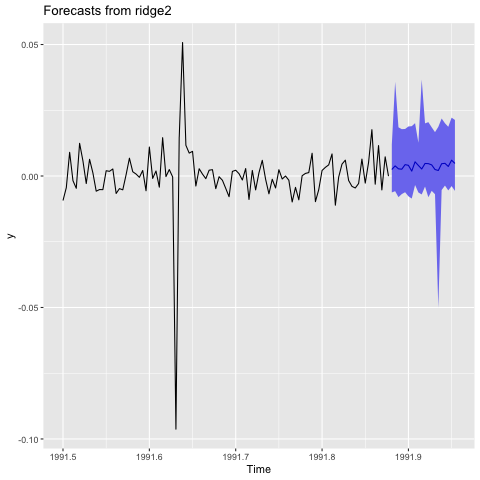

In [25]:
%%R
ggplot2::autoplot(res) # plot forecast

### Use `ahead::dynrmf` for univariate time series forecasting

`fdeaths` is used in this example too. The default model used by `ahead::dynrmf` is an automated ridge regression (automatic choice of the regularization parameter using Leave-One-Out cross-validation, see @bergmeir2018note):

**- Forecasting with `randomForest::randomForest`**


In [26]:
%%R
# Plotting forecasts
# With a Random Forest regressor, an horizon of 20,
# and a 95% prediction interval
fit_rf <- dynrmf(fdeaths, h=20, level=95, fit_func = randomForest::randomForest,
      fit_params = list(ntree = 50), predict_func = predict)

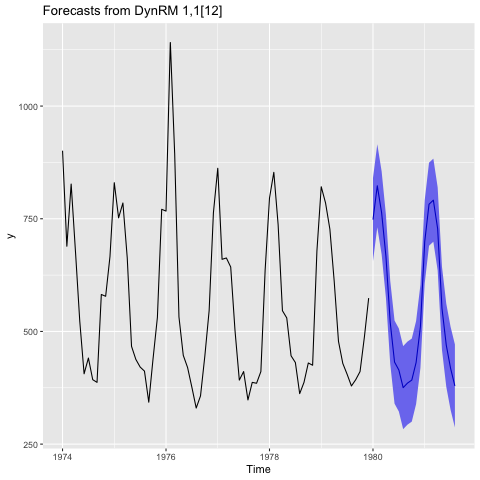

In [27]:
%%R
ggplot2::autoplot(fit_rf)

Check in-sample residuals:


	Ljung-Box test

data:  Residuals from DynRM 1,1[12]
Q* = 9.8649, df = 12, p-value = 0.6278

Model df: 0.   Total lags used: 12



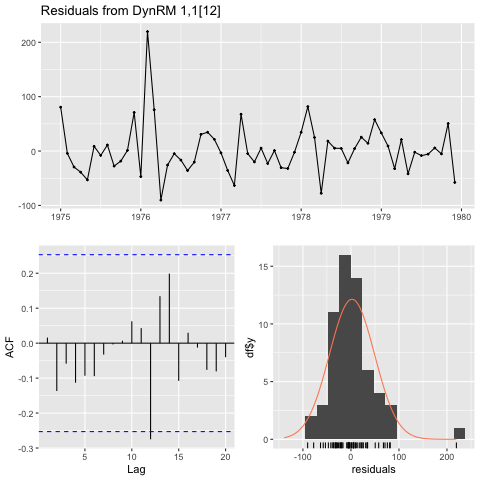

In [28]:
%%R
forecast::checkresiduals(fit_rf)

**- Forecasting with `e1071::svm`** (Support Vector Machines)

In [29]:
%%R
# With a Support Vector Machine regressor, an horizon of 20,
# and a 95% prediction interval
fit_svm <- ahead::dynrmf(fdeaths, h=20, level=95, fit_func = e1071::svm,
fit_params = list(kernel = "linear"), predict_func = predict)

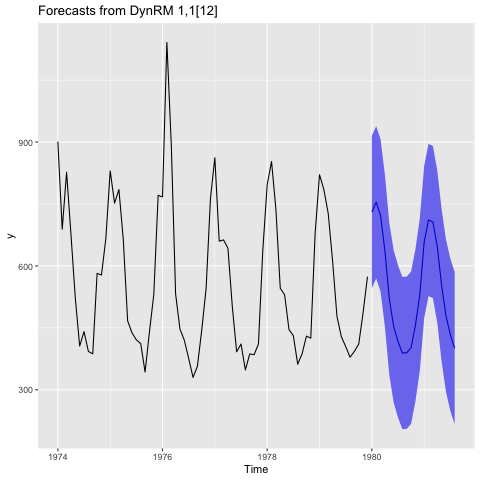

In [30]:
%%R
ggplot2::autoplot(fit_svm)

Check in-sample residuals:


	Ljung-Box test

data:  Residuals from DynRM 1,1[12]
Q* = 27.351, df = 12, p-value = 0.006875

Model df: 0.   Total lags used: 12



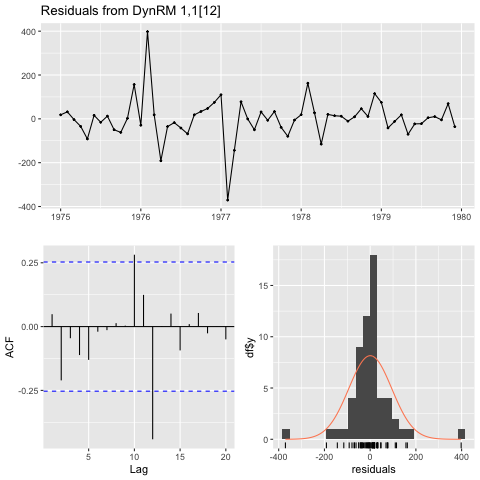

In [31]:
%%R
forecast::checkresiduals(fit_svm)

**- Use of an external regressor** (trend)

`AirPassengers`'s been widely tested in the specialized literature, because it has a trend, a seasonality, and is heteroskedastic (non-constant variance).

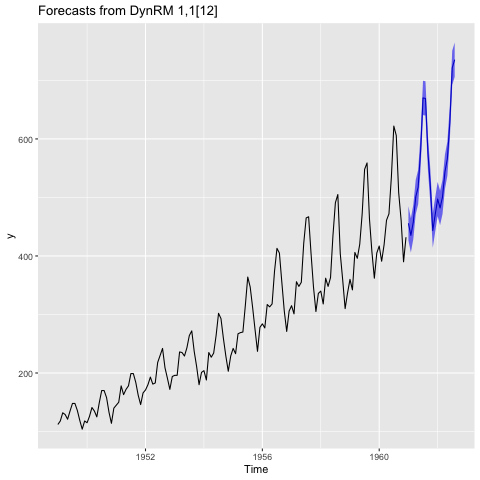

In [32]:
%%R
h <- 20L
res6 <- ahead::dynrmf(AirPassengers, xreg_fit = 1:length(AirPassengers),
                       xreg_predict = (length(AirPassengers)+1):(length(AirPassengers)+h),
                      h=h)
ggplot2::autoplot(res6)

### Use `ahead::ridge2f` for multivariate time series forecasting

The `insurance` dataset (@hyndman2013forecasting) contains monthly quotations and television advertising expenditure for a US insurance company from January 2002 to April 2005. Fast calibration of `ahead::ridge2f` relies on generalized leave-one-out cross-validation as it will be shown in the following \textsf{R} example. It's worth mentioning that **only the 2 regularization parameters are calibrated** here. Other model's hyperparameters such as the number of time series lags or the number of nodes in the hidden layer are set to their default values (respectively `1` and `5`).

In [33]:
%%R
objective_function <- function(xx)
{
    ahead::loocvridge2f(fpp::insurance,
                        h = 20L,
                        type_pi="blockbootstrap",
                        lambda_1=10^xx[1],
                        lambda_2=10^xx[2],
                        show_progress = FALSE,
                        )$loocv
}
start <- proc.time()[3]
(opt <- dfoptim::nmkb(fn=objective_function,
                      lower=c(-10,-10),
                      upper=c(10,10),
                      par=c(0.1, 0.1)))
print(proc.time()[3]-start)

elapsed 
 24.596 


**Forecasting using the _optimal_ regularization parameters**

  |=                                                                     |   1%

  |======================================================================| 100%
elapsed 
  1.933 


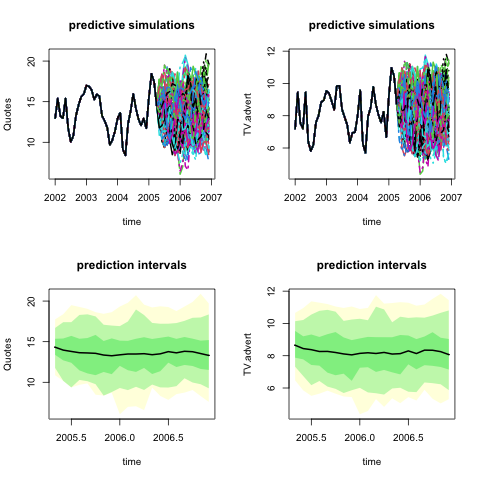

In [34]:
%%R
start <- proc.time()[3]
res <- ahead::ridge2f(fpp::insurance, h = 20L,
                      type_pi="blockbootstrap",
                      B = 100L, # number of predictive simulations
                      lambda_1=10^opt$par[1], # 'optimal' parameters
                      lambda_2=10^opt$par[2]) # 'optimal' parameters
print(proc.time()[3]-start)


par(mfrow=c(2, 2))
plot(res, "Quotes", type = "sims",
main = "predictive simulations")
plot(res, "TV.advert", type = "sims",
main = "predictive simulations")
plot(res, "Quotes", type = "dist",
main = "prediction intervals")
plot(res, "TV.advert", type = "dist",
main = "prediction intervals")

# Citations